# Pre-lecture Q1. - Q4.

# Q1.

1) Simple Linear Regression only has one predictor variable and can only measure the correlation between the predictor variable and the outcome variable. Multiple Linear Regression has multiple predictor variable and can measure the correlation between multiple predictor variables and the outcome variable, which means that it takes more factors into account. 

2) If you use continuous variable in Simple Linear Regression, it will be a line with the slope coefficient of $β_1$ as $y=β_0+β_1x+ϵ$ is the equation of line. If you use indicator variable in Simple Linear Regression, it will be a line going through the means of different indicator groups, as $β_1$ is the difference of means in two groups and $D$ can either be 0 or 1 in $y=β_0+β_1D+ϵ$. The continuous variable can be used to find out the linear correlation between predictor and outcome variable, and the indicator variable can be used to find out the difference of outcome varibale between two groups. 

3) If a single indicator variable is introduced alongside a continuous variable to create a Multiple Linear Regression, then the line can be expressed by $y=β_0+β_1x+β_2D+ϵ$ where D is the indicator variable introduced. As D can only be either 0 or 1, we get two lines $y=β_0+β_1x+ϵ$, which is what we had before the indicator variable was introduced, when $D = 0$ and $y=β_0+β_1x+β_2+ϵ$, which is the line with the same slope as before but different intercept coefficient of $β_0+β_2$, when $D = 1$.

4) If an interaction between a continuous and an indicator variable in Multiple Linear Regression models is added, then being in a certain indicator group can now change the slope of the line. The line can be expressed by $y=β_0+β_1x+β_2D+β_3(x*D)+ϵ$. As D can only be either 0 or 1, we get two lines $y=β_0+β_1x+ϵ$, which is what we had before the indicator variable and the interaction were introduced, when $D = 0$ and $y=(β_0+β_2)+(β_1+β_3)x+ϵ$, which is the line with a different slope of $(β_1+β_3)$ and different intercept coefficient of $β_0+β_2$, when $D = 1$.

5) If a non-binary categorical variable is used as an indicator variable in Multiple Linear Regression model, assuming that the indicator variable has $k$ distinct categories, $k-1$ number of binary indicator variables are needed to identify which category does the data point falls in. Therefore, the equation of line will be $y=β_0+β_1D_1+β_2D_2+β_3D_3+ ... +β_{k-1}D_{k-1}+ϵ$. In this case, $β_0$ is the mean of $y$ for the $kth$ category and $β_1$ is the difference in mean of $y$ between the $kth$ category and the $1st$ category. Followed by the equations, the expected outcomes are the mean of $y$ values for the category. 

# Q2.

1) The variables that we have to look into are Sales, which is the outcome variable, and two continuous predictor variables, which are amount spent on TV advertising and online advertising. Assuming that the predictor variables have no interaction with each other, a line of multiple linear regression can be modeled by $Sales = β_0+β_1(TV Advertising Spend)+β_2(Online Advertising Spend)+ϵ$ where $β_0$ is the intercept when no money is spent on any advertisement, $β_1$ is the change in sales for each additional dollar spent on TV advertising, assuming online advertising spend is constant, and $β_2$ is the change in sales for each additional dollar spent on online advertising, assuming TV advertising spend is constant. In this case, changing the amount spend on TV advertising only depends on $β_1$ value regardless of the amount spent on online advertising and vise versa. 

    On the other hand, if the predictor variables have interaction with each other, simply adding them will not give an accurate prediction of sales. The line can be modeled by $Sales=β_0+β_1(TV Advertising Spend)+β_2(Online Advertising Spend)+β_3(TV Advertising Spend × Online Advertising Spend)+ϵ$ where we just add $β_3$, which represents the interaction effect, to the previous equation. If the $β_3$ is positive, then the amount spent on TV advertising and online advertising have amplifying effect on each other, and if the $β_3$ is negative, then the amount spend on TV advertising and online advertising are diminising effect on each other. 


2) If the continuous variables are changed to binary indicator variables, the equation of line also has to change to $Sales = \beta_0+\beta_1 1_{[b_i=1]}(b_i) + \beta_2 1_{[s_i=1]}(s_i)$ for no interaction and $Sales = \beta_0+\beta_1 1_{[b_i=1]}(b_i) + \beta_2 1_{[s_i=1]}(s_i)+\beta_{3}(1_{[b_i=1]}(b_i) \times 1_{[s_i=1]}(s_i))$ for interactions as they are no longer a continuous variables but binary indicator variables with either 0 or 1 values. The predicted values for the no interaction is $\beta_0$ when they are both low, $\beta_0 + \beta_1$ if only TV advertisement is high, $\beta_0+\beta_2$ if only online advertisement is high, and $\beta_0+\beta_1+\beta_2$ if both are high.For interactions, the predictions are $\beta_0$ when they are both low, $\beta_0 + \beta_1$ if only TV advertisement is high, $\beta_0+\beta_2$ if only online advertisement is high, and $\beta_0+\beta_1+\beta_2+\beta_3$ if both are high.

# Q3.

# Importing Dataset

In [22]:
import pandas as pd
cols = pd.read_csv("https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/var_names.csv")
data_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
data = pd.read_csv(data_url, na_values=["9999", "", " ", "Presented but no response", "NA"], low_memory=False)

empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

data

,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,GEO_residence_canada,GEO_province,DEMO_age,DEMO_gender,DEMO_identity_vetrans,DEMO_identity_indigenous,DEMO_identity_lgbtq,DEMO_identity_disability,DEMO_identity_bipoc,DEMO_identity_pwud,DEMO_identity_newcomers,DEMO_identity_homeless,DEMO_identity_mental_health,DEMO_relationship_status,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,COVID_vaccinated_two_weeks_since_last_dose,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_tired,WELLNESS_malach_pines_burnout_measure_disappointed,WELLNESS_malach_pines_burnout_measure_hopeless,WELLNESS_malach_pines_burnout_measure_trapped,WELLNESS_malach_pines_burnout_measure_helpless,WELLNESS_malach_pines_burnout_measure_depressed,WELLNESS_malach_pines_burnout_measure_sick,WELLNESS_malach_pines_burnout_measure_worthless,WELLNESS_malach_pines_burnout_measure_difficulty_sleeping,WELLNESS_malach_pines_burnout_measure_had_it,CONNECTION_meaningful_interactions,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_walk_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_exercise_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,LONELY_ucla_loneliness_scale_companionship,LONELY_ucla_loneliness_scale_left_out,LONELY_ucla_loneliness_scale_isolated,CONNECTION_social_num_close_friends_grouped,CONNECTION_satisfied_num_friends,CONNECTION_neighbours_name_num,CONNECTION_social_days_family_p7d_grouped,CONNECTION_social_days_friends_p7d_grouped,CONNECTION_social_days_coworkers_and_classmates_p7d_grouped,CONNECTION_social_days_neighbours_p7d_grouped,CONNECTION_social_time_family_p7d_grouped,CONNECTION_social_time_friends_p7d_grouped,CONNECTION_social_time_coworkers_and_classmates_p7d_grouped,CONNECTION_social_time_neighbours_p7d_grouped,CONNECTION_social_num_family_p7d_grouped,CONNECTION_social_num_friends_p7d_grouped,CONNECTION_social_num_coworkers_and_classmates_p7d_grouped,CONNECTION_social_num_neighbours_p7d_grouped,...,PSYCH_relational_needs_satisfaction_scale_7pt_total_score,LONELY_ucla_loneliness_scale_score,LONELY_ucla_loneliness_scale_score_y_n,WELLNESS_malach_pines_burnout_measure_score,WELLNESS_malach_pines_burnout_measure_score_y_n,LONELY_dejong_emotional_social_loneliness_scale_score,LONELY_dejong_emotional_loneliness_sub_scale_score,LONELY_dejong_social_loneliness_sub_scale_score,LONELY_dejong_emotional_social_loneliness_scale_score_y_n,LONELY_dejong_emotional_loneliness_sub_scale_score_y_n,LONELY_dejong_social_loneliness_sub_scale_score_y_n,PSYCH_zimet_multidimensional_social_support_scale_score,PSYCH_zimet_multidimensional_social_support_family_subscale_score,PSYCH_zimet_multidimensional_social_support_significant_other_subscale_score,PSYCH_zimet_multidimensional_social_support_friends_subscale_score,WELLNESS_subjective_happiness_scale_score,WELLNESS_phq_score,WELLNESS_phq_score_y_n,WELLNESS_gad_score,WELLNESS_gad_score_y_n,PSYCH_social_interactions_anxiety_scale_score,PSYCH_social_interactions_anxiety_scale_score_y_n,PSYCH_social_phobia_scale_score

In [23]:
dataV2 = data[data.REMOVE_case=='No'].copy()
dataV2.shape

(10018, 1779)

In [24]:
dataV2_cohort = dataV2[dataV2.SURVEY_cohort_participant].copy()
dataV2_cohort.shape

(865, 1779)

In [25]:
dataV2_cohortV2 = dataV2_cohort[dataV2_cohort.SURVEY_collection_year!=2023].copy()
dataV2_cohortV2.shape

(850, 1779)

In [26]:
missingness_limit = 100 # this retains 166 of 1024 columns that aren't fully empty
columns2keep = dataV2_cohortV2.isna().sum() < missingness_limit
columns2keep = columns2keep.index[columns2keep]
dataV2_cohortV3 = dataV2_cohortV2[columns2keep].copy()
dataV2_cohortV3.shape

(850, 166)

In [27]:
pd.set_option('display.max_columns', dataV2_cohortV3.shape[1]) # Can cause jupyter notebooks to crash
dataV2_cohortV3

,UNIQUE_id,UNIQUE_num_records,ELIGIBLE_consent,COVID_prevention_distancing,COVID_prevention_masks,COVID_prevention_hand_washing,COVID_prevention_reduce_people,COVID_prevention_avoid_trips,COVID_prevention_household,COVID_vaccinated,WELLNESS_life_satisfaction,WELLNESS_malach_pines_burnout_measure_tired,WELLNESS_malach_pines_burnout_measure_disappointed,WELLNESS_malach_pines_burnout_measure_hopeless,WELLNESS_malach_pines_burnout_measure_trapped,WELLNESS_malach_pines_burnout_measure_helpless,WELLNESS_malach_pines_burnout_measure_depressed,WELLNESS_malach_pines_burnout_measure_sick,WELLNESS_malach_pines_burnout_measure_worthless,WELLNESS_malach_pines_burnout_measure_difficulty_sleeping,WELLNESS_malach_pines_burnout_measure_had_it,CONNECTION_activities_talked_day_p3m,CONNECTION_activities_talked_family_p3m,CONNECTION_activities_talked_job_p3m,CONNECTION_activities_talked_hobbies_p3m,CONNECTION_activities_phone_p3m,CONNECTION_activities_letter_or_email_p3m,CONNECTION_activities_checked_in_p3m,CONNECTION_activities_text_or_messaged_p3m,CONNECTION_activities_chat_p3m,CONNECTION_activities_video_chat_p3m,CONNECTION_activities_group_video_chat_p3m,CONNECTION_activities_walk_p3m,CONNECTION_activities_coffee_p3m,CONNECTION_activities_board_games_p3m,CONNECTION_activities_computer_games_p3m,CONNECTION_activities_onlinegames_p3m,CONNECTION_activities_visited_friends_p3m,CONNECTION_activities_visited_family_p3m,CONNECTION_activities_community_p3m,CONNECTION_activities_helped_p3m,CONNECTION_activities_meeting_work_p3m,CONNECTION_activities_discussion_group_p3m,CONNECTION_activities_group_exercise_p3m,CONNECTION_activities_church_p3m,CONNECTION_activities_new_friend_p3m,CONNECTION_activities_hug_p3m,CONNECTION_activities_kissed_p3m,CONNECTION_activities_sex_p3m,LONELY_ucla_loneliness_scale_companionship,LONELY_ucla_loneliness_scale_left_out,LONELY_ucla_loneliness_scale_isolated,CONNECTION_social_num_close_friends_grouped,CONNECTION_social_days_family_p7d_grouped,CONNECTION_social_days_friends_p7d_grouped,CONNECTION_social_days_coworkers_and_classmates_p7d_grouped,CONNECTION_social_days_neighbours_p7d_grouped,CONNECTION_social_time_family_p7d_grouped,CONNECTION_social_time_friends_p7d_grouped,CONNECTION_social_time_coworkers_and_classmates_p7d_grouped,CONNECTION_social_time_neighbours_p7d_grouped,CONNECTION_social_num_family_p7d_grouped,CONNECTION_social_num_friends_p7d_grouped,CONNECTION_social_num_coworkers_and_classmates_p7d_grouped,CONNECTION_social_num_neighbours_p7d_grouped,CONNECTION_preference_time_family_grouped,CONNECTION_preference_time_friends_grouped,CONNECTION_preference_time_coworkers_classmates_grouped,CONNECTION_preference_time_neighbours_grouped,LONELY_dejong_emotional_social_loneliness_scale_emptiness,LONELY_dejong_emotional_social_loneliness_scale_rely,LONELY_dejong_emotional_social_loneliness_scale_trust,LONELY_dejong_emotional_social_loneliness_scale_close,LONELY_dejong_emotional_social_loneliness_scale_miss,LONELY_dejong_emotional_social_loneliness_scale_rejected,LONELY_direct,LONELY_change_pre_covid,LONELY_others_aware,PSYCH_zimet_multidimensional_social_support_scale_need,PSYCH_zimet_multidimensional_social_support_scale_joys,PSYCH_zimet_multidimensional_social_support_scale_positive_not_scored,PSYCH_zimet_multidimensional_social_support_scale_gets_me_not_scored,PSYCH_zimet_multidimensional_social_support_scale_family_helps,PSYCH_zimet_multidimensional_social_support_scale_family_emotional,PSYCH_zimet_multidimensional_social_support_scale_comfort,PSYCH_zimet_multidimensional_social_support_scale_help,PSYCH_zimet_multidimensional_social_support_scale_go_wrong,PSYCH_zimet_multidimensional_social_support_scale_problems_family,PSYCH_zimet_multidimensional_social_support_scale_problems_friends,PSYCH_zimet_multidimensional_social_support_scale_sorrows,PSYCH_zimet_multidimensional_social_support_scale_feelings,PSYCH_zimet_multidimensional_social_support_scale_decisions,WELLNESS_self_rated_physical_health,WELLNESS_self_rated_me

# Perform Logistic Regression

In [34]:
import pandas as pd

# Load the data
data_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
data = pd.read_csv(data_url, na_values=["9999", "", " ", "Presented but no response", "NA"], low_memory=False)

# Check the categories and their counts for the two specified columns
friends_counts = data['CONNECTION_activities_visited_friends_p3m'].value_counts(dropna=False)
family_counts = data['CONNECTION_activities_visited_family_p3m'].value_counts(dropna=False)

print("Categories and counts for CONNECTION_activities_visited_friends_p3m:")
print(friends_counts)

print("\nCategories and counts for CONNECTION_activities_visited_family_p3m:")
print(family_counts)

Categories and counts for CONNECTION_activities_visited_friends_p3m:
CONNECTION_activities_visited_friends_p3m
NaN                             4756
Not in the past three months    1672
A few times a month             1358
Less than monthly               1309
Monthly                          982
Weekly                           849
A few times a week               399
Daily or almost daily            106
Name: count, dtype: int64

Categories and counts for CONNECTION_activities_visited_family_p3m:
CONNECTION_activities_visited_family_p3m
NaN                             4764
Not in the past three months    1559
Less than monthly               1282
A few times a month             1259
Monthly                          980
Weekly                           884
A few times a week               447
Daily or almost daily            256
Name: count, dtype: int64


In [39]:
import pandas as pd
import statsmodels.formula.api as smf

# Load the data
data_url = "https://raw.githubusercontent.com/pointOfive/stat130chat130/refs/heads/main/CP/CSCS_data_anon.csv"
data = pd.read_csv(data_url, na_values=["9999", "", " ", "Presented but no response", "NA"], low_memory=False)

# Preprocess the data
data = data.dropna(subset=['CONNECTION_activities_visited_friends_p3m', 'CONNECTION_activities_visited_family_p3m', 'WELLNESS_phq_score_y_n'])
data['WELLNESS_phq_score_y_n_binary'] = data['WELLNESS_phq_score_y_n'].apply(lambda x: 1 if x == "Yes (3-6)" else 0)

# Specify the logistic regression formula
formula = 'WELLNESS_phq_score_y_n_binary ~ C(CONNECTION_activities_visited_friends_p3m) * C(CONNECTION_activities_visited_family_p3m)'

# Fit the logistic regression model
log_reg_fit = smf.logit(formula, data=data).fit()

# Display the model summary
log_reg_fit.summary()

         Current function value: 0.631285
         Iterations: 35


/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Logit Regression Results                                
=========================================================================================
Dep. Variable:     WELLNESS_phq_score_y_n_binary   No. Observations:                 5628
Model:                                     Logit   Df Residuals:                     5579
Method:                                      MLE   Df Model:                           48
Date:                           Mon, 11 Nov 2024   Pseudo R-squ.:                 0.01366
Time:                                   21:25:48   Log-Likelihood:                -3552.9
converged:                                 False   LL-Null:                       -3602.1
Covariance Type:                       nonrobust   LLR p-value:                 2.500e-05
============================================================================================================================================================================================================================
                                                                                                                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                                                                   -0.8942      0.113     -7.901      0.000      -1.116      -0.672
C(CONNECTION_activities_visited_friends_p3m)[T.A few times a week]                                                                                           0.5758      0.348      1.657      0.098      -0.105       1.257
C(CONNECTION_activities_visited_friends_p3m)[T.Daily or almost daily]                                                                                       -1.0517      1.075     -0.978      0.328      -3.159       1.055
C(CONNECTION_activities_visited_friends_p3m)[T.Less than monthly]                                                                                            0.0100      0.224      0.045      0.964      -0.428       0.448
C(CONNECTION_activities_visited_friends_p3m)[T.Monthly]                                                                                                      0.2573      0.192      1.343      0.179      -0.118       0.633
C(CONNECTION_activities_visited_friends_p3m)[T.Not in the past three months]                                                                                 0.2570      0.215      1.198      0.231      -0.164       0.678
C(CONNECTION_activities_visited_friends_p3m)[T.Weekly]                                                                                                       0.5332      0.193      2.757      0.006       0.154       0.912
C(CONNECTION_activities_visited_family_p3m)[T.A few times a week]                                                                                            0.4495      0.280      1.605      0.108      -0.099       0.999
C(CONNECTION_activities_visited_family_p3m)[T.Daily or almost daily]                                                                                         0.0004      0.412      0.001      0.999      -0.806       0.807
C(CONNECTION_activities_visited_family_p3m)[T.Less than monthly]                                                                                            -0.0440      0.209     -0.211      0.833      -0.454       0.366
C(CONNECTION_activities_visited_family_p3m)[T.Monthly]                                                                                                       0.5101      0.185      2.763      0.006       0.148       0.872
C(CONNECTION_activities_visited_family_p3m)[T.No

3) The formula that I can use to predict the outcome is
$Log-Odds=β_0+β_1×Friends+β_2×Family+β_3×(Friends×Family)$ where there exist multiple $\beta_1$ for each categories of CONNECTION_activities_visited_friends_p3m, also multiple $\beta_2$ for each categories of CONNECTION_activities_visited_family_p3m, and also multiple $\beta_3$ for the interaction between two variables. We can predict the outcome value of log-odds by plugging in the values of $\beta_0, \beta_1, \beta_2 and \beta_3$ respectively from the table and use the log-odds value to determine the binary outcome.

4) By looking at the table above, we can find the p value for the correlation of each categorical combinations of the preedictor variables. Some p values are lower than 0.05 which means that we have evidence against the null hypothesis and some are above 0.05 which means that we do not have evidence against the null hypothesis. (In this case, the null hypothesis is the correlation does not exist)

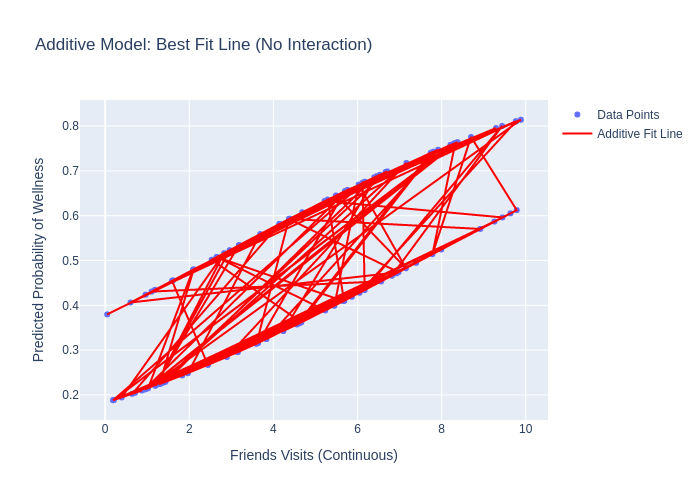

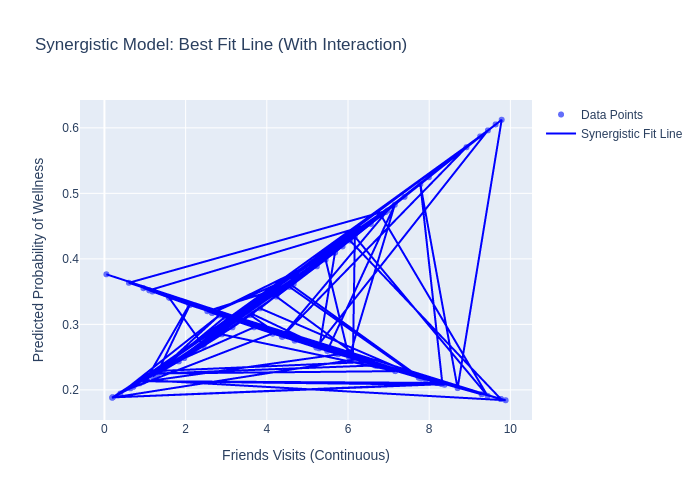

In [45]:
import numpy as np
import plotly.graph_objects as go

# Generate synthetic data for visualization
np.random.seed(0)

# Simulating continuous predictor (number of visits to friends)
x_friends = np.random.uniform(0, 10, size=100)  # Number of visits (continuous)
x_family = np.random.choice([0, 1], size=100)  # Family visits (binary)

# Assuming model coefficients (simplified for demonstration)
# These coefficients should be from your actual logistic regression model
beta_0 = -1.5  # Intercept (example value)
beta_friends = 0.2  # Coefficient for friends visits (example value)
beta_family = 1.0  # Coefficient for family visits (example value)
beta_interaction = -0.3  # Coefficient for interaction term (example value)

# Calculate the probability using the logistic regression equation (simplified)
probability = 1 / (1 + np.exp(-(beta_0 + beta_friends * x_friends + beta_family * x_family + beta_interaction * x_friends * x_family)))

# Create synthetic data points for plotting
data_points = pd.DataFrame({
    'friends': x_friends,
    'family': x_family,
    'probability': probability
})

# Plot 1: Additive specification (no interaction term)
additive_model = beta_0 + beta_friends * data_points['friends'] + beta_family * data_points['family']
additive_probability = 1 / (1 + np.exp(-additive_model))

fig_additive = go.Figure()

fig_additive.add_trace(go.Scatter(x=data_points['friends'], y=additive_probability, mode='markers', name="Data Points"))
fig_additive.add_trace(go.Scatter(x=data_points['friends'], y=additive_probability, mode='lines', name="Additive Fit Line", line=dict(color='red', width=2)))

fig_additive.update_layout(title="Additive Model: Best Fit Line (No Interaction)",
                           xaxis_title="Friends Visits (Continuous)",
                           yaxis_title="Predicted Probability of Wellness",
                           showlegend=True)

# Plot 2: Synergistic specification (with interaction term)
synergistic_model = beta_0 + beta_friends * data_points['friends'] + beta_family * data_points['family'] + beta_interaction * data_points['friends'] * data_points['family']
synergistic_probability = 1 / (1 + np.exp(-synergistic_model))

fig_synergistic = go.Figure()

fig_synergistic.add_trace(go.Scatter(x=data_points['friends'], y=synergistic_probability, mode='markers', name="Data Points"))
fig_synergistic.add_trace(go.Scatter(x=data_points['friends'], y=synergistic_probability, mode='lines', name="Synergistic Fit Line", line=dict(color='blue', width=2)))

fig_synergistic.update_layout(title="Synergistic Model: Best Fit Line (With Interaction)",
                              xaxis_title="Friends Visits (Continuous)",
                              yaxis_title="Predicted Probability of Wellness",
                              showlegend=True)

# Show both plots
fig_additive.show(renderer="png")
fig_synergistic.show(renderer="png")

# Q4.

"The model only explains 17.6% of the variability in the data" means that $R^2$ value is only 17.6%, which can be translated into that the fit model only covers 17.6% of the variability in the outcome variable. "Many of the coefficients are larger than 10 while having strong or very strong evidence against the null hypothesis of 'no effect'" means that the correlation is very strong and it is very unlikely to be happened by random chance. Two statements above means evaluate significance of two different things. $R^2$ value measures the significance of the fit model and coefficients and p-value measures the significance of correlation. 

In [46]:
import pandas as pd

url = "https://raw.githubusercontent.com/KeithGalli/pandas/master/pokemon_data.csv"
# fail https://github.com/KeithGalli/pandas/blob/master/pokemon_data.csv
pokeaman = pd.read_csv(url) 
pokeaman

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


In [47]:
import statsmodels.formula.api as smf

model1_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") + C(Generation) + Q("Sp. Def"):C(Generation)', data=pokeaman)
model2_spec = smf.ols(formula='HP ~ Q("Sp. Def") * C(Generation)', data=pokeaman)

model2_fit = model2_spec.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     15.27
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           3.50e-27
Time:                        21:59:00   Log-Likelihood:                -3649.4
No. Observations:                 800   AIC:                             7323.
Df Residuals:                     788   BIC:                             7379.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          26.8971      5.246      5.127      0.000      16.599      37.195
C(Generation)[T.2]                 20.0449      7.821      2.563      0.011       4.692      35.398
C(Generation)[T.3]                 21.3662      6.998      3.053      0.002       7.629      35.103
C(Generation)[T.4]                 31.9575      8.235      3.881      0.000      15.793      48.122
C(Generation)[T.5]                  9.4926      7.883      1.204      0.229      -5.982      24.968
C(Generation)[T.6]                 22.2693      8.709      2.557      0.011       5.173      39.366
Q("Sp. Def")                        0.5634      0.071      7.906      0.000       0.423       0.703
Q("Sp. Def"):C(Generation)[T.2]    -0.2350      0.101     -2.316      0.021      -0.434      -0.036
Q("Sp. Def"):C(Generation)[T.3]    -0.3067      0.093     -3.300      0.001      -0.489      -0.124
Q("Sp. Def"):C(Generation)[T.4]    -0.3790      0.105     -3.600      0.000      -0.586      -0.172
Q("Sp. Def"):C(Generation)[T.5]    -0.0484      0.108     -0.447      0.655      -0.261       0.164
Q("Sp. Def"):C(Generation)[T.6]    -0.3083      0.112     -2.756      0.006      -0.528      -0.089
==============================================================================
Omnibus:                      337.229   Durbin-Watson:                   1.505
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2871.522
Skew:                           1.684   Prob(JB):                         0.00
Kurtosis:                      11.649   Cond. No.                     1.40e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Q5.

In [86]:
import numpy as np
from sklearn.model_selection import train_test_split

fifty_fifty_split_size = int(pokeaman.shape[0]*0.5)

# Replace "NaN" (in the "Type 2" column with "None")
pokeaman.fillna('None', inplace=True)

np.random.seed(130)
pokeaman_train,pokeaman_test = \
  train_test_split(pokeaman, train_size=fifty_fifty_split_size)
pokeaman_train

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
370,338,Solrock,Rock,Psychic,70,95,85,55,65,70,3,False
6,6,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
242,224,Octillery,Water,None,75,105,75,105,75,45,2,False
661,600,Klang,Steel,None,60,80,95,70,85,50,5,False
288,265,Wurmple,Bug,None,45,45,35,20,30,20,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
522,471,Glaceon,Ice,None,65,60,110,130,95,65,4,False
243,225,Delibird,Ice,Flying,45,55,45,65,45,75,2,False
797,720,HoopaHoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
117,109,Koffing,Poison,None,40,65,95,60,45,35,1,False


### This code is to split the dataset into half resulting in two sets: pokeaman_train and pokeaman_test.

In [75]:
model_spec3 = smf.ols(formula='HP ~ Attack + Defense', 
                      data=pokeaman_train)
model3_fit = model_spec3.fit()
model3_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     34.40
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.66e-14
Time:                        23:35:42   Log-Likelihood:                -1832.6
No. Observations:                 400   AIC:                             3671.
Df Residuals:                     397   BIC:                             3683.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     42.5882      3.580     11.897      0.000      35.551      49.626
Attack         0.2472      0.041      6.051      0.000       0.167       0.327
Defense        0.1001      0.045      2.201      0.028       0.011       0.190
==============================================================================
Omnibus:                      284.299   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5870.841
Skew:                           2.720   Prob(JB):                         0.00
Kurtosis:                      20.963   Cond. No.                         343.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### This code creates a ols fitted line for outcome variable HP in relation to the predictor variables Attack and Defense with no interaction to each other using the pokeaman_train dataset.

In [76]:
yhat_model3 = model3_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model3_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model3)[0,1]**2)

'In sample' R-squared:     0.14771558304519894
'Out of sample' R-squared: 0.21208501873920738


### This code calculates In sample $R^2$ and Out of sample $R^2$ by getting the $R^2$ of the fitted line created above to the pokeaman_train dataset, and finding the correlation between the the predicted outcome value using the fitted line created using the pokeaman_train dataset and the real outcome values of pokeaman_test dataset. 

In [77]:
model4_linear_form = 'HP ~ Attack * Defense * Speed * Legendary'
model4_linear_form += ' * Q("Sp. Def") * Q("Sp. Atk")'
# DO NOT try adding '* C(Generation) * C(Q("Type 1")) * C(Q("Type 2"))'
# That's 6*18*19 = 6*18*19 possible interaction combinations...
# ...a huge number that will blow up your computer

model4_spec = smf.ols(formula=model4_linear_form, data=pokeaman_train)
model4_fit = model4_spec.fit()
model4_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     4.764
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.23e-21
Time:                        23:35:47   Log-Likelihood:                -1738.6
No. Observations:                 400   AIC:                             3603.
Df Residuals:                     337   BIC:                             3855.
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
====================================================================================================================================
                                                                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                          521.5715    130.273      4.004      0.000     265.322     777.821
Legendary[T.True]                                                   -6.1179      2.846     -2.150      0.032     -11.716      -0.520
Attack                                                              -8.1938      2.329     -3.518      0.000     -12.775      -3.612
Attack:Legendary[T.True]                                         -1224.9610    545.105     -2.247      0.025   -2297.199    -152.723
Defense                                                             -6.1989      2.174     -2.851      0.005     -10.475      -1.923
Defense:Legendary[T.True]                                         -102.4030     96.565     -1.060      0.290    -292.350      87.544
Attack:Defense                                                       0.0985      0.033      2.982      0.003       0.034       0.164
Attack:Defense:Legendary[T.True]                                    14.6361      6.267      2.336      0.020       2.310      26.963
Speed                                                               -7.2261      2.178     -3.318      0.001     -11.511      -2.942
Speed:Legendary[T.True]                                            704.8798    337.855      2.086      0.038      40.309    1369.450
Attack:Speed                                                         0.1264      0.038      3.351      0.001       0.052       0.201
Attack:Speed:Legendary[T.True]                                       5.8648      2.692      2.179      0.030       0.570      11.160
Defense:Speed                                                        0.1026      0.039      2.634      0.009       0.026       0.179
Defense:Speed:Legendary[T.True]                                     -6.9266      3.465     -1.999      0.046     -13.742      -0.111
Attack:Defense:Speed                                                -0.0016      0.001     -2.837      0.005      -0.003      -0.001
Attack:Defense:Speed:Legendary[T.True]                              -0.0743      0.030     -2.477      0.014      -0.133      -0.015
Q("Sp. Def")                                                        -5.3982      1.938     -2.785      0.006      -9.211      -1.586
Legendary[T.True]:Q("Sp. Def")                                    -282.2496    126.835     -2.225      0.027    -531.738     -32.761
Attack:Q("Sp. Def")                                                  0.1094      0.034      3.233      0.001       0.043       0.176
Attack:Legendary[T.True]:Q("Sp. Def")                               12.6503      5.851      2.162      0.031       1.141      24.160
Defense:Q("Sp. Def")    

### This code creates a ols between the outcome variable HP and predictor variables Attack, Defense, Speed, and Legendary with interactions between all four variables and added the interaction variable between Sp. Def and Sp. Atk. Then, the line is fitted using .fit using the pokeaman_train dataset.

In [78]:
yhat_model4 = model4_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model4_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model4)[0,1]**2)

'In sample' R-squared:     0.46709442115833855
'Out of sample' R-squared: 0.002485342598992873


### This code compares the In sample $R^2$ and Out of sample $R^2$ by comparing the $R^2$ obtained from the fitted line created above using the pokeaman_train dataset and the correlation between predicted outcome values using the fitted line and the true outocme values of the pokeaman_test dataset. As the out of sample metric is lower than the in sample metric, the fit model is overfitting.

### These series of codes illustrates how to test the generalizability of the fitted line obtained using a dataset to another dataset. 

# Q6.

The model4_linear_form (linear form specification of model4) creates new predictor variables as the columns by introducing interactions between the predictor variables. As there are already multiple variables, when interaction between them are introduced, the equation of the fitted line will be extremely complex. As new interaction variables are introduced, there are more chance that multicollinearity occurs, as more predictor variables could be correlated to each other, resulting into the model to be overfitting to the dataset. As shown above, the model was overfitted to the pokeaman_train dataset resulting in less generalizability of the fit model to another pokeaman_test dataset. 

# Q7.

In [79]:
# Here's something a little more reasonable...
model5_linear_form = 'HP ~ Attack + Defense + Speed + Legendary'
model5_linear_form += ' + Q("Sp. Def") + Q("Sp. Atk")'
model5_linear_form += ' + C(Generation) + C(Q("Type 1")) + C(Q("Type 2"))'

model5_spec = smf.ols(formula=model5_linear_form, data=pokeaman_train)
model5_fit = model5_spec.fit()
model5_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     4.948
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           9.48e-19
Time:                        23:35:55   Log-Likelihood:                -1765.0
No. Observations:                 400   AIC:                             3624.
Df Residuals:                     353   BIC:                             3812.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     10.1046     14.957      0.676      0.500     -19.312      39.521
Legendary[T.True]             -3.2717      4.943     -0.662      0.508     -12.992       6.449
C(Generation)[T.2]             9.2938      4.015      2.315      0.021       1.398      17.189
C(Generation)[T.3]             2.3150      3.915      0.591      0.555      -5.385      10.015
C(Generation)[T.4]             4.8353      4.149      1.165      0.245      -3.325      12.995
C(Generation)[T.5]            11.4838      3.960      2.900      0.004       3.696      19.272
C(Generation)[T.6]             4.9206      4.746      1.037      0.300      -4.413      14.254
C(Q("Type 1"))[T.Dark]        -1.4155      6.936     -0.204      0.838     -15.057      12.226
C(Q("Type 1"))[T.Dragon]       0.8509      6.900      0.123      0.902     -12.720      14.422
C(Q("Type 1"))[T.Electric]    -6.3641      6.537     -0.974      0.331     -19.220       6.491
C(Q("Type 1"))[T.Fairy]       -1.9486     10.124     -0.192      0.847     -21.859      17.962
C(Q("Type 1"))[T.Fighting]     7.0308      7.432      0.946      0.345      -7.586      21.648
C(Q("Type 1"))[T.Fire]         3.0779      6.677      0.461      0.645     -10.055      16.210
C(Q("Type 1"))[T.Flying]      -2.1231     22.322     -0.095      0.924     -46.025      41.779
C(Q("Type 1"))[T.Ghost]        5.7343      8.488      0.676      0.500     -10.960      22.429
C(Q("Type 1"))[T.Grass]        3.3275      5.496      0.605      0.545      -7.481      14.136
C(Q("Type 1"))[T.Ground]       9.5118      7.076      1.344      0.180      -4.404      23.428
C(Q("Type 1"))[T.Ice]         -0.9313      7.717     -0.121      0.904     -16.108      14.246
C(Q("Type 1"))[T.Normal]      18.4816      5.312      3.479      0.001       8.034      28.929
C(Q("Type 1"))[T.Poison]       8.3411      7.735      1.078      0.282      -6.871      23.554
C(Q("Type 1"))[T.Psychic]      1.8061      6.164      0.293      0.770     -10.317      13.930
C(Q("Type 1"))[T.Rock]        -3.8558      6.503     -0.593      0.554     -16.645       8.933
C(Q("Type 1"))[T.Steel]       -4.0053      8.044     -0.498      0.619     -19.826      11.816
C(Q("Type 1"))[T.Water]        9.7988      5.166      1.897      0.059      -0.361      19.959
C(Q("Type 2"))[T.Dark]         5.8719     15.185      0.387      0.699     -23.993      35.737
C(Q("Type 2"))[T.Dragon]      13.2777     14.895      0.891      0.373     -16.016      42.571
C(Q("Type 2"))[T.Electric]    14.3228     17.314      0.827      0.409     -19.728      48.374
C(Q("Type 2"))[T.Fairy]        2.8426     14.268      0.199      0.842     -25.218      30.903
C(Q("Type 2"))[T.Fighting]     1.9741     14.089      0.140      0.889     -25.735      29.683
C(Q("Type 2"))[T.Fire]         0.2001     1

In [80]:
yhat_model5 = model5_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model5_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model5)[0,1]**2)

'In sample' R-squared:     0.3920134083531893
'Out of sample' R-squared: 0.30015614488652215


### model5_linear_form is extended and developed from model3_fit because it added more predictor variables than the model3_fit which takes more predictor variables into account to better capture the relationship between the outcome and the predictors.  model5_linear_form is extended and developed from model4_fit because it  added more predictor variables but without the interactions between the predictor variables preventing it from becoming too complex. 

In [81]:
# Here's something a little more reasonable...
model6_linear_form = 'HP ~ Attack + Speed + Q("Sp. Def") + Q("Sp. Atk")'
# And here we'll add the significant indicators from the previous model
# https://chatgpt.com/share/81ab88df-4f07-49f9-a44a-de0cfd89c67c
model6_linear_form += ' + I(Q("Type 1")=="Normal")'
model6_linear_form += ' + I(Q("Type 1")=="Water")'
model6_linear_form += ' + I(Generation==2)'
model6_linear_form += ' + I(Generation==5)'

model6_spec = smf.ols(formula=model6_linear_form, data=pokeaman_train)
model6_fit = model6_spec.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                     24.36
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           2.25e-30
Time:                        23:36:01   Log-Likelihood:                -1783.6
No. Observations:                 400   AIC:                             3585.
Df Residuals:                     391   BIC:                             3621.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                             22.8587      3.876      5.897      0.000      15.238      30.479
I(Q("Type 1") == "Normal")[T.True]    17.5594      3.339      5.258      0.000      10.994      24.125
I(Q("Type 1") == "Water")[T.True]      9.0301      3.172      2.847      0.005       2.794      15.266
I(Generation == 2)[T.True]             6.5293      2.949      2.214      0.027       0.732      12.327
I(Generation == 5)[T.True]             8.4406      2.711      3.114      0.002       3.112      13.770
Attack                                 0.2454      0.037      6.639      0.000       0.173       0.318
Speed                                 -0.1370      0.045     -3.028      0.003      -0.226      -0.048
Q("Sp. Def")                           0.3002      0.045      6.662      0.000       0.212       0.389
Q("Sp. Atk")                           0.1192      0.042      2.828      0.005       0.036       0.202
==============================================================================
Omnibus:                      271.290   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4238.692
Skew:                           2.651   Prob(JB):                         0.00
Kurtosis:                      18.040   Cond. No.                         618.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
yhat_model6 = model6_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model6_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2)

'In sample' R-squared:     0.3326310334310908
'Out of sample' R-squared: 0.29572460427079933


### model6_linear_form is extended and developed from model5_linear_form because it refined the categorical variables by only keeping the categories with significant p-values to reduce complexity of the linear form. 

In [84]:
# And here's a slight change that seems to perhaps improve prediction...
model7_linear_form = 'HP ~ Attack * Speed * Q("Sp. Def") * Q("Sp. Atk")'
model7_linear_form += ' + I(Q("Type 1")=="Normal")'
model7_linear_form += ' + I(Q("Type 1")=="Water")'
model7_linear_form += ' + I(Generation==2)'
model7_linear_form += ' + I(Generation==5)'

model7_spec = smf.ols(formula=model7_linear_form, data=pokeaman_train)
model7_fit = model7_spec.fit()
model7_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     HP   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     12.16
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.20e-29
Time:                        23:36:19   Log-Likelihood:                -1769.5
No. Observations:                 400   AIC:                             3579.
Df Residuals:                     380   BIC:                             3659.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 95.1698     34.781      2.736      0.007      26.783     163.556
I(Q("Type 1") == "Normal")[T.True]        18.3653      3.373      5.445      0.000      11.733      24.997
I(Q("Type 1") == "Water")[T.True]          9.2913      3.140      2.959      0.003       3.117      15.466
I(Generation == 2)[T.True]                 7.0711      2.950      2.397      0.017       1.271      12.871
I(Generation == 5)[T.True]                 7.8557      2.687      2.923      0.004       2.572      13.140
Attack                                    -0.6975      0.458     -1.523      0.129      -1.598       0.203
Speed                                     -1.8147      0.554     -3.274      0.001      -2.905      -0.725
Attack:Speed                               0.0189      0.007      2.882      0.004       0.006       0.032
Q("Sp. Def")                              -0.5532      0.546     -1.013      0.312      -1.627       0.521
Attack:Q("Sp. Def")                        0.0090      0.007      1.311      0.191      -0.004       0.023
Speed:Q("Sp. Def")                         0.0208      0.008      2.571      0.011       0.005       0.037
Attack:Speed:Q("Sp. Def")                 -0.0002   9.06e-05     -2.277      0.023      -0.000   -2.82e-05
Q("Sp. Atk")                              -0.7277      0.506     -1.439      0.151      -1.722       0.267
Attack:Q("Sp. Atk")                        0.0136      0.005      2.682      0.008       0.004       0.024
Speed:Q("Sp. Atk")                         0.0146      0.007      2.139      0.033       0.001       0.028
Attack:Speed:Q("Sp. Atk")                 -0.0002    5.4e-05     -3.383      0.001      -0.000   -7.65e-05
Q("Sp. Def"):Q("Sp. Atk")                  0.0103      0.007      1.516      0.130      -0.003       0.024
Attack:Q("Sp. Def"):Q("Sp. Atk")          -0.0001   6.71e-05     -2.119      0.035      -0.000   -1.03e-05
Speed:Q("Sp. Def"):Q("Sp. Atk")           -0.0002   8.82e-05     -2.075      0.039      -0.000   -9.62e-06
Attack:Speed:Q("Sp. Def"):Q("Sp. Atk")   2.03e-06   7.42e-07      2.734      0.007     5.7e-07    3.49e-06
==============================================================================
Omnibus:                      252.300   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3474.611
Skew:                           2.438   Prob(JB):                         0.00
Kurtosis:                      16.590   Cond. No.                     2.34e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+09. Thi

In [85]:
yhat_model7 = model7_fit.predict(pokeaman_test)
y = pokeaman_test.HP
print("'In sample' R-squared:    ", model7_fit.rsquared)
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2)

'In sample' R-squared:     0.37818209127432456
'Out of sample' R-squared: 0.35055389205977444


### model7_linear_form is extended and developed from model6_linear_form because it introduced interaction between the continuous predictor variables allowing the model to explore the combined effect of the continuous predictor variables on the outcome variable while keeping the categorical variables the same as model6_linear_form to prevent overcomplexity. 

# Q8.

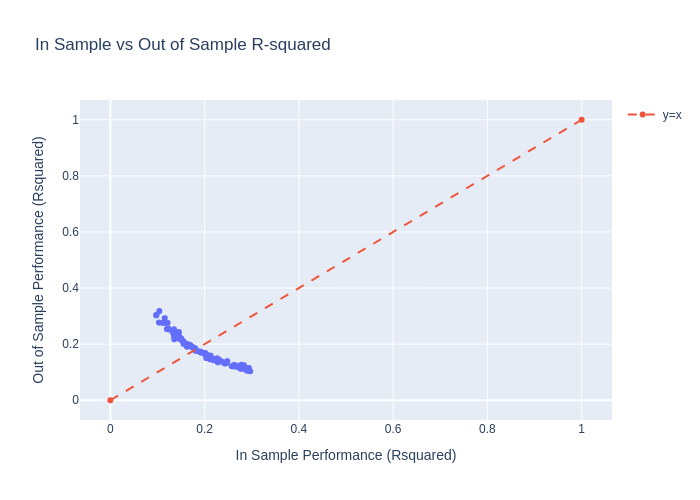

In [63]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf

# Load the data (assuming pokeaman is already loaded as per your previous code)
# Ensure 'pokeaman' is loaded and prepared

# Define the formula for model3 (based on earlier discussions)
linear_form = 'HP ~ Attack + Defense'

# Set the number of repetitions for bootstrapping
reps = 100

# Arrays to store R-squared values
in_sample_Rsquared = np.array([0.0]*reps)
out_of_sample_Rsquared = np.array([0.0]*reps)

for i in range(reps):
    # Split the data into training and testing sets
    pokeaman_train, pokeaman_test = train_test_split(pokeaman, train_size=0.5, random_state=np.random.randint(0, 10000))

    # Fit the model to the training data
    final_model_fit = smf.ols(formula=linear_form, data=pokeaman_train).fit()

    # Store the in-sample R-squared
    in_sample_Rsquared[i] = final_model_fit.rsquared

    # Compute the out-of-sample R-squared by comparing predicted vs actual values on the test set
    y_test = pokeaman_test.HP
    yhat_test = final_model_fit.predict(pokeaman_test)
    out_of_sample_Rsquared[i] = np.corrcoef(y_test, yhat_test)[0, 1]**2

# Create a DataFrame to hold the results
df = pd.DataFrame({
    "In Sample Performance (Rsquared)": in_sample_Rsquared,
    "Out of Sample Performance (Rsquared)": out_of_sample_Rsquared
})

# Create a scatter plot to visualize the performance
fig = px.scatter(df, x="In Sample Performance (Rsquared)", 
                 y="Out of Sample Performance (Rsquared)", title="In Sample vs Out of Sample R-squared")

# Add the "y=x" line for comparison
fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], name="y=x", line_shape='linear', line=dict(dash='dash')))

# Show the plot
fig.show(renderer="png")

### By spliting the dataset into half and calculate in sample and out of sample metrics multiple times using for loops, we can obtain the variability of the fit model and observe its generalizability. As the data point on y=x line means that the fit model is perfectly generalizable to other datasets (in sample = out of sample), the data points mostly concentrated above the y=x on scatter plot implies overfitting, and the data points mostly concentrated below the y=x on scatter plot implies underfitting. The generalizability is high when the data points are centered around y=x and the variance is low. 

# Q9.

In [87]:
model7_gen1_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model7_gen1_predict_future_fit = model7_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model7_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.5726118179916575 (gen1_predict_future)
'Out of sample' R-squared: 0.11151363354803218 (gen1_predict_future)


In [88]:
model7_gen1to5_predict_future = smf.ols(formula=model7_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model7_gen1to5_predict_future_fit = model7_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model7_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model7)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model7_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model7_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.37818209127432456 (original)
'Out of sample' R-squared: 0.35055389205977444 (original)
'In sample' R-squared:     0.3904756578094535 (gen1to5_predict_future)
'Out of sample' R-squared: 0.23394915464343125 (gen1to5_predict_future)


In [89]:
model6_gen1_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation==1])
model6_gen1_predict_future_fit = model6_gen1_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1_predict_future_fit.rsquared, "(gen1_predict_future)")
y = pokeaman[pokeaman.Generation!=1].HP
yhat = model6_gen1_predict_future_fit.predict(pokeaman[pokeaman.Generation!=1])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.4433880517727282 (gen1_predict_future)
'Out of sample' R-squared: 0.1932858534276128 (gen1_predict_future)


In [90]:
model6_gen1to5_predict_future = smf.ols(formula=model6_linear_form,
                                   data=pokeaman[pokeaman.Generation!=6])
model6_gen1to5_predict_future_fit = model6_gen1to5_predict_future.fit()
print("'In sample' R-squared:    ", model6_fit.rsquared, "(original)")
y = pokeaman_test.HP
print("'Out of sample' R-squared:", np.corrcoef(y,yhat_model6)[0,1]**2, "(original)")
print("'In sample' R-squared:    ", model6_gen1to5_predict_future_fit.rsquared, "(gen1to5_predict_future)")
y = pokeaman[pokeaman.Generation==6].HP
yhat = model6_gen1to5_predict_future_fit.predict(pokeaman[pokeaman.Generation==6])
print("'Out of sample' R-squared:", np.corrcoef(y,yhat)[0,1]**2, "(gen1to5_predict_future)")

'In sample' R-squared:     0.3326310334310908 (original)
'Out of sample' R-squared: 0.29572460427079933 (original)
'In sample' R-squared:     0.33517279824114776 (gen1to5_predict_future)
'Out of sample' R-squared: 0.26262690178799936 (gen1to5_predict_future)


### The codes above are comparing the generalizability of model6 and model7 by applying them to generation 1 sample and generation 1 to 5 sample. Originally when using np.random.seed(130), the model7 had higher generalizability with closer in sample and out of sample $R^2$ than model6. However, due to its complexity over model6, model7 showed relatively inconsistent generalizabilty than model 6while working with generation 1 and generation 1 to 5 samples. 

### In addition, by comparing the results of when we used generation 1 sample to predict other generations and when we used generation 1 to 5 sample to predict generation 6 data, we know that more data in the sample allows us to prevent overfitting for both models and makes future predictions more reliable. 

Here’s a concise summary of our interactions:

1. **Introduction to Data Analysis and Logistic Regression**:
   - You began by working on a logistic regression model using the dataset from the CSCS data (focused on well-being and connection activities). We discussed how to fit a logistic regression model, handle categorical predictors, and interpret the results.
   - The discussions around **categorical predictors** in logistic regression clarified how to handle them by specifying them as categorical variables using the `C()` function, which creates dummy variables for the predictors.
   - Challenges such as the **convergence warning** and **singular matrix errors** were addressed, indicating that multicollinearity or data issues might be causing problems with the model.

2. **Understanding and Implementing Statistical Models**:
   - We then transitioned to working with the **Pokémon dataset** (pokeaman) for linear regression tasks. You worked through multiple iterations of model building, with increasing complexity:
     - You started with simple models (e.g., predicting HP using Attack and Defense) and expanded them by including more predictors (e.g., Speed, Legendary status, etc.).
     - We discussed **multicollinearity** in the context of interactions between variables, explaining how it can affect model generalization and the fit of regression models.
   - As the models became more complex (with interaction terms like `Attack * Speed * Sp. Def`), we examined their performance in terms of **in-sample** and **out-of-sample** R-squared.

3. **Generalization and Overfitting**:
   - We explored how training a model on certain **generations of Pokémon** (e.g., Generations 1-5) and testing it on **other generations** (e.g., Generation 6) demonstrates the **model’s ability to generalize** across data not seen during training.
   - You then built models focused on **predicting future data** (e.g., testing on Generation 6 after training on other generations), which led to discussions on **generalization error** and how the model’s **out-of-sample performance** can change when the training data differs from the test data.

4. **Practical Demonstration Using Plotly and Simulations**:
   - You used **Plotly** to visualize how the model’s **out-of-sample prediction accuracy** changes with repeated model training and testing. This allowed you to assess how the model behaves with **random splits** of data, visualizing **in-sample vs out-of-sample** performance.
   - We also looked into the effects of **multicollinearity** and how models with many interaction terms can become unstable, especially when using a complex design matrix.

5. **Final Models and Future Predictions**:
   - You extended your models by creating versions trained on subsets of the data (e.g., **Generation 1**, **Generations 1-5**) and observed how well they performed when predicting for **other generations**.
   - Finally, you applied these models to make **predictions for future generations**, evaluating whether the models could generalize and whether overfitting was an issue.

### Key Concepts and Takeaways:
- **Categorical Variables**: Handling categorical predictors in logistic and linear regression models by converting them into dummy variables using `C()`.
- **Model Complexity and Multicollinearity**: As interaction terms increase, multicollinearity becomes a concern, impacting model stability and generalization.
- **Generalization and Overfitting**: The importance of testing a model on data outside of the training set (e.g., testing on Pokémon generations not seen during training) to evaluate its ability to generalize.
- **In-sample vs Out-of-sample Performance**: Comparing R-squared values for the training data and testing data to evaluate model overfitting or underfitting.
- **Predictive Performance Across Groups**: Evaluating how well a model trained on one group of data (e.g., Generations 1-5) performs when predicting on a different group (e.g., Generation 6), demonstrating generalizability.

This interaction walked through various regression techniques, model building, and testing procedures, while addressing issues related to model assumptions, overfitting, and the importance of generalizability in predictive analytics.

https://chatgpt.com/share/67329857-47e0-8009-8f4c-a4b0be6d1136